In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<AxesSubplot:>

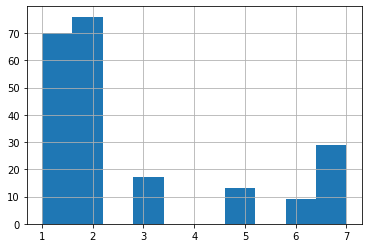

In [4]:
data["Type"].hist()

In [5]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


sns.heatmap(data.corr())

In [6]:
list(data["Type"].unique())

[1, 2, 3, 5, 6, 7]

# P(Y=y) for all values of y i.e target class

In [7]:
def calculate_prior(df,Y):
    classes=sorted(list(df["Type"].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

# P(X=x|Y=y) using Gaussian distribution

In [9]:
def calculate_likelihood(df,feature_name,feature_value,Y,label):
    feature=list(df.columns)
    df=df[df[Y]==label]
    mean,std=df[feature_name].mean(),df[feature_name].std()
    p_x_given_y=(1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feature_value-mean)**2 / (2 * std**2 )))
    return p_x_given_y
    

In [10]:
labels=sorted(list(data["Type"].unique()))
[1]*len(labels)

[1, 1, 1, 1, 1, 1]

# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [13]:
def Naive_bayes(df,X,Y):
    features=list(df.columns)[:-1]
    prior=calculate_prior(df,Y)
    y_pred=[]
    
    for x in X:
        labels=sorted(list(df[Y].unique()))
        likelihood=[1]*len(labels)
        
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]*=calculate_likelihood(df,features[i],X[i],Y,labels[j])
                
            post_prob=[1]*len(labels)
            
            for j in range(len(labels)):
                post_prob[j]=likelihood[j]*prior[j]
                
            y_pred.append(np.argmax(post_prob))
            
        return np.array(y_pred)
    

# TESTING

In [14]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=.2,random_state=41)

X_test=test.iloc[:,:-1].values
Y_test=test.iloc[:,-1].values

y_pred=Naive_bayes(train,X=X_test,Y="Type")


from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test.all(), Y_pred.all()))
print(f1_score(Y_test.all(), Y_pred.all()))

i:\python\python system files\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [24]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Type")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print("F1 SCORE = ")
print(f1_score(Y_test, Y_pred,average='macro'))

[[ 0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0]
 [14  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]]
F1 SCORE = 
0.0
